# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt



In [2]:
# Recopila y almacena información sobre el crecimiento de la compañía cada tres meses, desde junio de 2009. 
# Almacena el texto scrapeado de la web en alguna variable.
url =  "https://ycharts.com/companies/TSLA/revenues"
html_data = requests.get(url, time.sleep(10)).text

if "403 ERROR" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac 05 X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    html_data = requests.get(url, headers=headers)
    time.sleep(19)
    html_data = html_data.text
html_data

'\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=functio

In [3]:
soup = BeautifulSoup(html_data, "html.parser")

soup



<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [4]:
tables = soup.find_all("table")
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2023</td>
 <td class="text-right">
                             
                  

In [5]:
#encontrar el indice de la tabla que se busca
for index, table in enumerate(tables):
    if {"Date" in str(table)}:
        table_index = index
        break
    print(table)
table_index

0

In [6]:
#convertir la tabla en un data frame
import pandas as pd

tesla_df = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = float(col[1].text.strip().replace("B",""))
        tesla_df = pd.concat([tesla_df, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

/tmp/ipykernel_512/2543127052.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tesla_df = pd.concat([tesla_df, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)


In [7]:
tesla_df.head()

,Date,Revenue
0,"March 31, 2024",21.30
1,"December 31, 2023",25.17
2,"September 30, 2023",23.35
3,"June 30, 2023",24.93
4,"March 31, 2023",23.33


In [8]:
# crear una base de datos e incluir los datos limpios en ella.
# crear la base de datos, la tabla, insertar valores, comit.

#declarar una conexion, dar nombre a la base de datos 
conn = sqlite3.connect("tesla.db")

#declarar cursor (permite ejecutar sentencias SQL dentro de la base de datos dentro de una conexion)
c = conn.cursor()

#crear la tabla
c.execute("CREATE TABLE tesla_revenue (date TEXT, revenue REAL)")
conn.commit()

#llevar data frame a la tabla
tesla_df.to_sql("tesla_revenue", conn, if_exists="replace", index=False)


25

In [9]:
#imprimir lista de los datos como pares ordenados
c.execute("SELECT * FROM tesla_revenue").fetchall()

[('March 31, 2024', 21.3),
 ('December 31, 2023', 25.17),
 ('September 30, 2023', 23.35),
 ('June 30, 2023', 24.93),
 ('March 31, 2023', 23.33),
 ('December 31, 2022', 24.32),
 ('September 30, 2022', 21.45),
 ('June 30, 2022', 16.93),
 ('March 31, 2022', 18.76),
 ('December 31, 2021', 17.72),
 ('September 30, 2021', 13.76),
 ('June 30, 2021', 11.96),
 ('March 31, 2021', 10.39),
 ('December 31, 2020', 10.74),
 ('September 30, 2020', 8.771),
 ('June 30, 2020', 6.036),
 ('March 31, 2020', 5.985),
 ('December 31, 2019', 7.384),
 ('September 30, 2019', 6.303),
 ('June 30, 2019', 6.35),
 ('March 31, 2019', 4.541),
 ('December 31, 2018', 7.226),
 ('September 30, 2018', 6.824),
 ('June 30, 2018', 4.002),
 ('March 31, 2018', 3.409)]

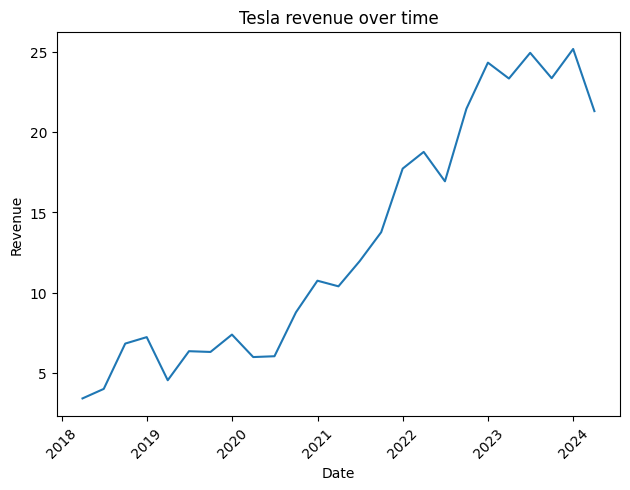

In [11]:
#Graficar los datos
#Gráfico de Líneas de Ingresos de Tesla a lo Largo del Tiempo
import seaborn as sns

tesla_df["Date"] = pd.to_datetime(tesla_df["Date"])

sns.lineplot(x="Date", y="Revenue", data=tesla_df)
plt.title("Tesla revenue over time")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

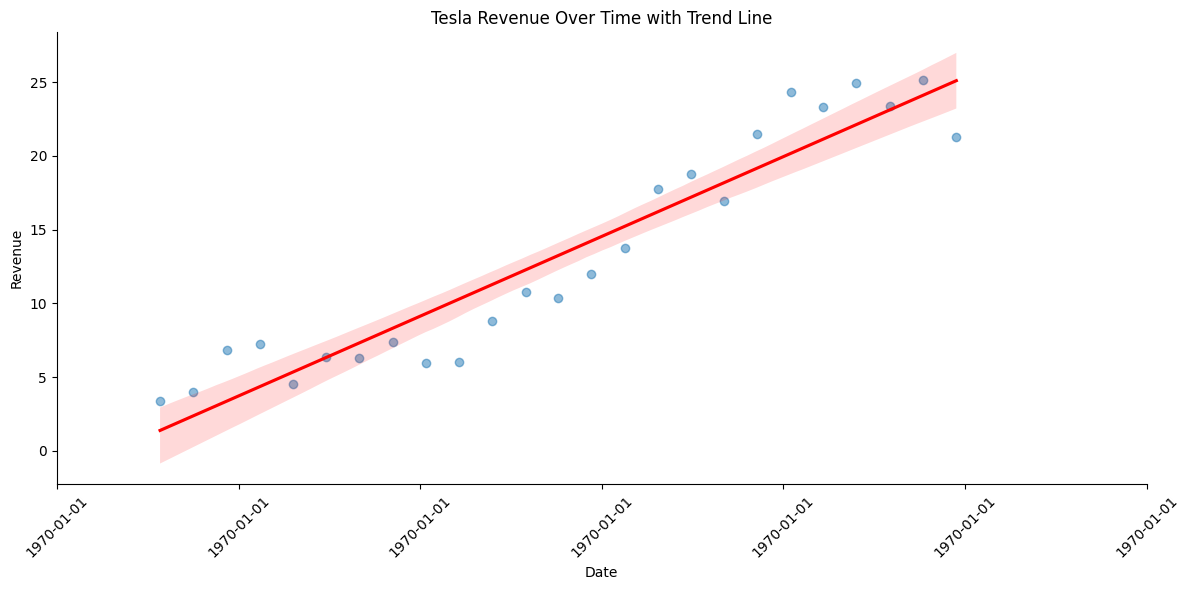

In [16]:
#Diagrama de Dispersión con Líneas de Tendencia

# Convertir fechas a números ordinales
tesla_df["Date_ordinal"] = tesla_df["Date"].apply(lambda x: x.toordinal())

# Gráfico de dispersión con línea de tendencia
sns.lmplot(x="Date_ordinal", y="Revenue", data=tesla_df, aspect=2, height=6, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("Tesla Revenue Over Time with Trend Line")
plt.xlabel("Date")
plt.ylabel("Revenue")

# Convertir las etiquetas x a fechas
locs, labels = plt.xticks()
plt.xticks(locs, [pd.to_datetime(int(label)).strftime('%Y-%m-%d') for label in locs], rotation=45)

plt.tight_layout()
plt.show()

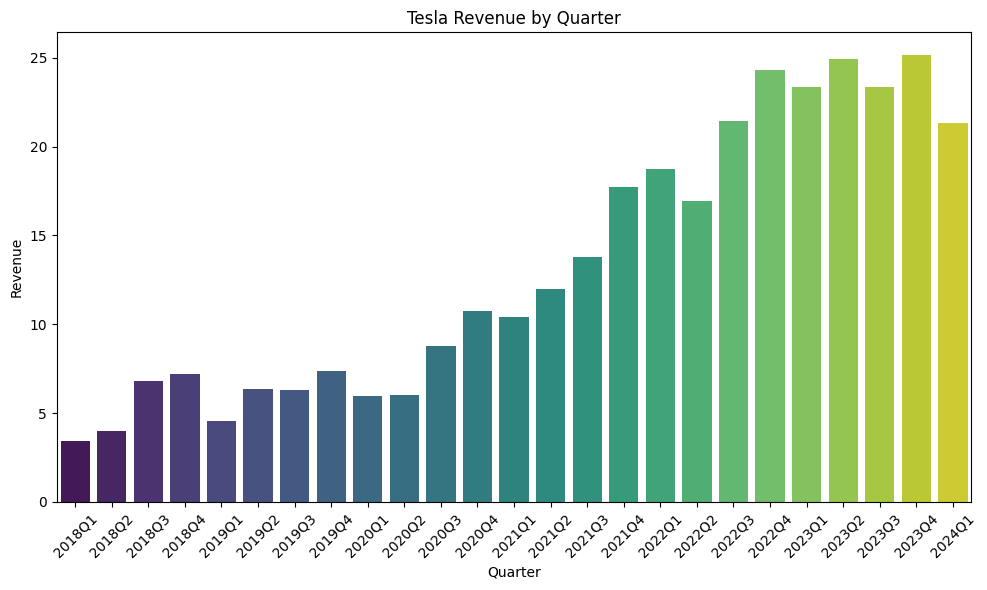

In [13]:
#grafico trimestral
# Agrupar por trimestre
tesla_df['Quarter'] = tesla_df['Date'].dt.to_period('Q')

# Calcular ingresos por trimestre
revenue_by_quarter = tesla_df.groupby('Quarter')['Revenue'].sum().reset_index()

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Revenue', data=revenue_by_quarter, hue="Quarter", palette='viridis', legend=False)
plt.title('Tesla Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()